## Import Packages & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
#machin learning algorithms 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [3]:
df = pd.read_csv('loan-data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Information

In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handle Missing Values

In [9]:
missed_gender_percentage = (df.Gender.isnull().sum()/df.shape[0])*100
print('Totle missing values ',df.Gender.isnull().sum())
print('gender information missing (in %)',missed_gender_percentage)
df['Gender'].value_counts()

Totle missing values  13
gender information missing (in %) 2.1172638436482085


Male      489
Female    112
Name: Gender, dtype: int64

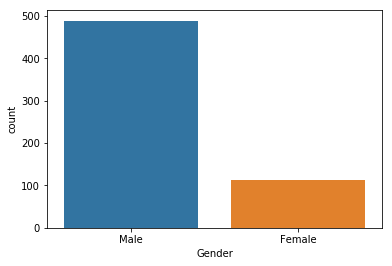

In [10]:
sns.countplot(x=df['Gender'])

Here the ratio of Male applicants is grater than the female so we will replace missing values with MALE

In [11]:
## pd.crosstab(df.Gender, [df.Married,df.Dependents], rownames=['Gender'], colnames=['Married','Dependents'])

In [12]:
df['Gender'].fillna(value='Male',inplace=True)
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [13]:
missed_Married_percentage = (df.Married.isnull().sum()/df.shape[0])*100
print('Totle Married missing values ',df.Married.isnull().sum())
print('Married information missing (in %)',missed_Married_percentage)
df['Married'].value_counts()

Totle Married missing values  3
Married information missing (in %) 0.4885993485342019


Yes    398
No     213
Name: Married, dtype: int64

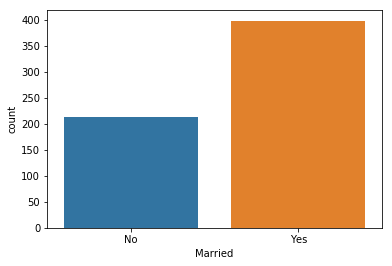

In [14]:
sns.countplot(x=df['Married'])

In [15]:
df['Married'].fillna(value='Yes',inplace=True)
df['Self_Employed'].isnull().sum()

32

Totle Dependents missing values  15
Dependents information missing (in %) 2.44299674267101


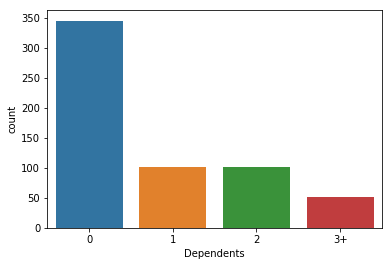

In [16]:
missed_Dependents_percentage = (df.Dependents.isnull().sum()/df.shape[0])*100
print('Totle Dependents missing values ',df.Dependents.isnull().sum())
print('Dependents information missing (in %)',missed_Dependents_percentage)

sns.countplot(x=df['Dependents'])

In [17]:
df['Dependents'].fillna(value='0',inplace=True)
df['Self_Employed'].isnull().sum()

32

Totle Self_Employed missing values  32
Self_Employed information missing (in %) 5.211726384364821


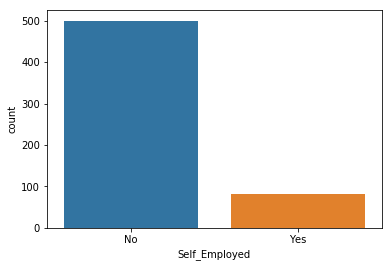

In [18]:
missed_Self_Employed_percentage = (df.Self_Employed.isnull().sum()/df.shape[0])*100
print('Totle Self_Employed missing values ',df.Self_Employed.isnull().sum())
print('Self_Employed information missing (in %)',missed_Self_Employed_percentage)

sns.countplot(x=df['Self_Employed'])

In [19]:
df['Self_Employed'].fillna(value='No',inplace=True)
df['Self_Employed'].isnull().sum()

0

In [20]:
missed_LoanAmount_percentage = (df.LoanAmount.isnull().sum()/df.shape[0])*100
print('Totle LoanAmount missing values ',df.LoanAmount.isnull().sum())
print('LoanAmount information missing (in %)',missed_LoanAmount_percentage)

Totle LoanAmount missing values  22
LoanAmount information missing (in %) 3.5830618892508146


[Text(0.5,0,'Loan Amount')]

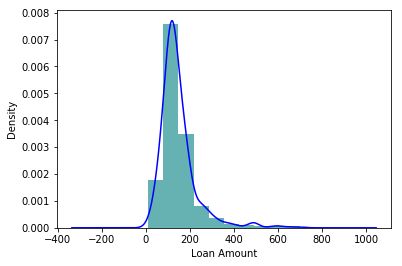

In [21]:
ax = df["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
df["LoanAmount"].plot(kind='density', color='blue')
ax.set(xlabel='Loan Amount')

In [22]:
df['LoanAmount'].fillna(df["LoanAmount"].mean(skipna=True), inplace=True)

In [23]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

Totle Loan_Amount_Term missing values  14
Loan_Amount_Term information missing (in %) 2.2801302931596092
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


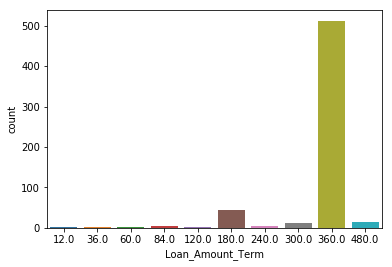

In [24]:
missed_Loan_Amount_Term_percentage = (df.Loan_Amount_Term.isnull().sum()/df.shape[0])*100
print('Totle Loan_Amount_Term missing values ',df.Loan_Amount_Term.isnull().sum())
print('Loan_Amount_Term information missing (in %)',missed_Loan_Amount_Term_percentage)
print(df['Loan_Amount_Term'].value_counts())
sns.countplot(x=df['Loan_Amount_Term'])

In [25]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True) #idxmax for most repeted

Totle Credit_History missing values  50
Credit_History information missing (in %) 8.143322475570033
1.0    475
0.0     89
Name: Credit_History, dtype: int64
[ 1.  0. nan]


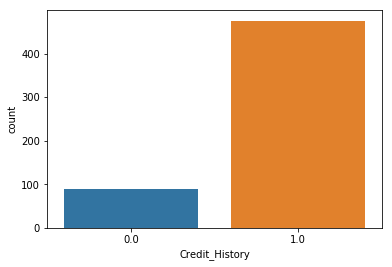

In [26]:
missed_Credit_History_percentage = (df.Credit_History.isnull().sum()/df.shape[0])*100
print('Totle Credit_History missing values ',df.Credit_History.isnull().sum())
print('Credit_History information missing (in %)',missed_Credit_History_percentage)
print(df['Credit_History'].value_counts())
print(df.Credit_History.unique())
sns.countplot(x=df['Credit_History']) 

In [27]:
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace=True)

In [28]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Data Conversion

In [33]:
df2 = df 

In [34]:
gender_stat = {'Female': 0, 'Male': 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2} 

df2['Gender'] = df2['Gender'].replace(gender_stat)
df2['Married'] = df2['Married'].replace(yes_no_stat)
df2['Dependents'] = df2['Dependents'].replace(dependents_stat)
df2['Education'] = df2['Education'].replace(education_stat)
df2['Self_Employed'] = df2['Self_Employed'].replace(yes_no_stat)
df2['Property_Area'] = df2['Property_Area'].replace(property_stat)
df2['Loan_Status'] = df2['Loan_Status'].replace(yes_no_stat)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null object
dtypes: float64(4), int64(7), object(2)
memory usage: 62.4+ KB


In [36]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,N
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y


## Machine learnging Starts from here

In [63]:
#Separate feature and target
x = df2.iloc[:,1:12]
y = df2.iloc[:,12]

score = []

In [64]:
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 78.03%


In [65]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 76.39%


In [66]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 70.71%


In [67]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 61.24%


In [68]:
clf  =  svm.LinearSVC()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 54.73%


## Result

In [69]:
#make variabel for save the result and to show it
classifier = ('Gradient Boosting','Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[0.7802749867794818, 0.763881544156531, 0.7070597567424642, 0.612374405076679, 0.5473030142781596]


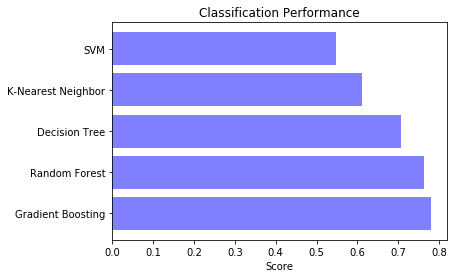

In [73]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()